In [1]:
### install, import, download


!pip install mlxtend

import pandas as pd                                             #for dataframe operations
import numpy as np                                              #for array operations

import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend : machine learning extensions

import random
import matplotlib.pyplot as plt                                 ## it shows immediatly after matplot lib if not we have to do plt.show()
%matplotlib inline 


import networkx as nx

from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error,adjusted_rand_score,accuracy_score # Error Metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # To Scale the data
from sklearn.model_selection import train_test_split, GridSearchCV          # To split the data

from sklearn.cluster import KMeans,AgglomerativeClustering 

from scipy.cluster.hierarchy import linkage, dendrogram

#from imblea import CondensedNearestNeighbour                    # Implementation based on Hart's condensed knn

#### Install surprise package

#!pip install scikit-surprise
#!pip install surprise
#! conda install -c conda-forge scikit-surprise
#from surprise import BaselineOnly

#from surprise import BaselineOnly
#from surprise import Dataset
#from surprise import Reader, KNNWithMeans
#from surprise.model_selection import cross_validate
#from collections import defaultdict
#from itertools import islice

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

!pip install xgboost

from sklearn.svm import SVC

import statsmodels.formula.api as sm                           #logistic regression
from scipy.stats import mode

!pip install graphviz
import graphviz
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn import tree

!pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


import pandas_profiling as pp

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

ImportError: cannot import name 'factorial'

In [2]:
train_dengai_dt = pd.read_csv("dengue_features_train.csv")
test_dengai_dt = pd.read_csv("dengue_features_test.csv")
label_dengai_dt = pd.read_csv("dengue_labels_train.csv",delimiter=",")

In [3]:
train_dengai_dt.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [4]:
test_dengai_dt.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.0189,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.0124,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0


In [5]:
label_dengai_dt.head(3)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4


In [6]:
column_names = train_dengai_dt.columns
column_names

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

### Value counts of every column in the data

In [7]:
for c in column_names:
    print(c ,"and its various levels along with distribution")
    v=train_dengai_dt[c].value_counts()
    print(v)
    print("*" * 30)

city and its various levels along with distribution
sj    936
iq    520
Name: city, dtype: int64
******************************
year and its various levels along with distribution
2001    104
2003    104
2002    104
2007    104
2006    104
2005    104
2004    104
2000     78
2008     69
1991     52
2009     52
1999     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1990     35
2010     26
Name: year, dtype: int64
******************************
weekofyear and its various levels along with distribution
27    28
26    28
24    28
23    28
22    28
21    28
20    28
19    28
18    28
17    28
16    28
15    28
14    28
13    28
12    28
11    28
10    28
9     28
8     28
7     28
6     28
5     28
4     28
3     28
2     28
25    28
1     28
40    28
51    28
49    28
48    28
47    28
46    28
45    28
44    28
43    28
42    28
41    28
28    28
39    28
38    28
37    28
36    28
35    28
34    28
33    28
32    28
31    28
30    28
29    28
50  

### Missing values

In [8]:
#missing values.
train_dengai_dt.apply(lambda x: sum(x.isnull()),axis=0)


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
test_dengai_dt.apply(lambda x: sum(x.isnull()),axis=0)

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [10]:
train_dengai_dt=train_dengai_dt.merge(label_dengai_dt,on=["city","year","weekofyear"])

In [11]:
train_dengai_dt.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


\### checked for duplicate rows in the data 

In [12]:
train_dengai_dt.duplicated().value_counts()

False    1456
dtype: int64

### Dimentions of the data

In [13]:
train_dengai_dt.shape

(1456, 25)

In [14]:
train_dengai_dt["total_cases"].value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

### Data type of the data

In [15]:
train_dengai_dt.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

### column names

In [16]:
train_dengai_dt.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [17]:
train_dengai_dt.shape

(1456, 25)

In [18]:
test_dengai_dt.shape

(416, 24)

In [19]:
test_dengai_dt.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

### City and Total cases

In [20]:
train_dengai_dt.groupby('city', as_index=False)["total_cases"].sum()

,city,total_cases
0,iq,3934
1,sj,31993


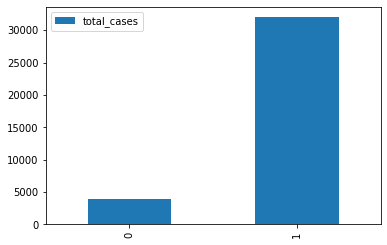

In [21]:
train_dengai_dt.groupby('city', as_index=False)["total_cases"].sum().plot(kind = "bar",)

### Year and total cases

In [22]:
train_dengai_dt.groupby('year', as_index=False)["total_cases"].sum()

,year,total_cases
0,1990,866
1,1991,2801
2,1992,2371
3,1993,1156
4,1994,6533
5,1995,1333
6,1996,855
7,1997,1454
8,1998,4595
9,1999,1633


<BarContainer object of 21 artists>

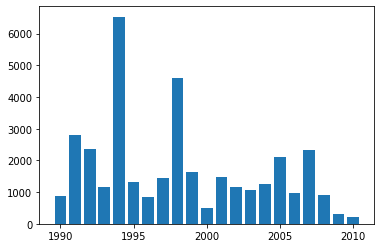

In [23]:
x=train_dengai_dt.groupby('year')["total_cases"].sum()
plt.bar(x=x.index,height=x)

<BarContainer object of 21 artists>

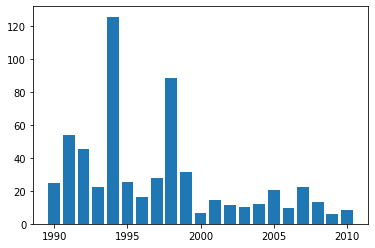

In [24]:
x=train_dengai_dt.groupby('year')["total_cases"].mean()
plt.bar(x=x.index,height=x)

In [25]:
train_dengai_dt["weekofyear"].max()

53

In [26]:
test_dengai_dt["weekofyear"].max()

53

In [27]:
train_dengai_dt['week_start_date'] = pd.to_datetime(train_dengai_dt['week_start_date'])
train_dengai_dt['month'] = train_dengai_dt['week_start_date'].dt.month
train_dengai_dt["month"].head(3)

0    4
1    5
2    5
Name: month, dtype: int64

In [28]:
test_dengai_dt['week_start_date'] = pd.to_datetime(test_dengai_dt['week_start_date'])
test_dengai_dt['month'] = test_dengai_dt['week_start_date'].dt.month
test_dengai_dt["month"].head(3)

0    4
1    5
2    5
Name: month, dtype: int64

In [29]:
train_dengai_dt["month"].value_counts()

7     140
4     140
1     140
10    133
9     119
12    112
11    112
8     112
6     112
5     112
3     112
2     112
Name: month, dtype: int64

In [30]:

train_dengai_dt["monthNames"]=pd.cut(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],x=train_dengai_dt["month"],labels=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],include_lowest=True)

In [31]:

test_dengai_dt["monthNames"]=pd.cut(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],x=test_dengai_dt["month"],labels=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],include_lowest=True)

In [32]:
train_dengai_dt.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,monthNames
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4,apr
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5,may
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5,may
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5,may
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5,may


In [33]:
test_dengai_dt.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,monthNames
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4,apr
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5,may
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5,may
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5,may
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5,may


In [34]:
train_dengai_dt.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,monthNames
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4,apr
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5,may
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5,may
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5,may
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5,may


In [35]:
test_dengai_dt.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,monthNames
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4,apr
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5,may
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5,may
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5,may
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5,may


In [36]:
train_dengai_dt["weekhalf_names"]=pd.cut(bins=[1,3,5,7,9,11,14,16,18,20,22,25,27,29,31,33,35,38,40,42,44,46,49,51,54],x=train_dengai_dt["weekofyear"],labels=["jan1sthalf","jan2sthalf","feb1sthalf","feb2sthalf","mar1sthalf","mar2sthalf","apr1sthalf","april2ndhalf","may1sthalf","may2ndhalf","jun1sthalf","jun2ndhalf","jul1sthalf","jul2ndhalf","aug1sthalf","aug2ndhalf","sep1sthalf","sep2ndhalf","oct1sthalf","oct2ndhalf","nov1sthalf","nov2ndhalf","dec1sthalf","dec2ndhalf"],include_lowest=True)
test_dengai_dt["weekhalf_names"]=pd.cut(bins=[1,3,5,7,9,11,14,16,18,20,22,25,27,29,31,33,35,38,40,42,44,46,49,51,54],x=test_dengai_dt["weekofyear"],labels=["jan1sthalf","jan2sthalf","feb1sthalf","feb2sthalf","mar1sthalf","mar2sthalf","apr1sthalf","april2ndhalf","may1sthalf","may2ndhalf","jun1sthalf","jun2ndhalf","jul1sthalf","jul2ndhalf","aug1sthalf","aug2ndhalf","sep1sthalf","sep2ndhalf","oct1sthalf","oct2ndhalf","nov1sthalf","nov2ndhalf","dec1sthalf","dec2ndhalf"],include_lowest=True)


<BarContainer object of 24 artists>

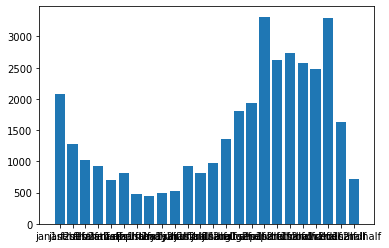

In [37]:
x=train_dengai_dt.groupby('weekhalf_names')["total_cases"].sum()
plt.bar(x=x.index,height=x)

<BarContainer object of 24 artists>

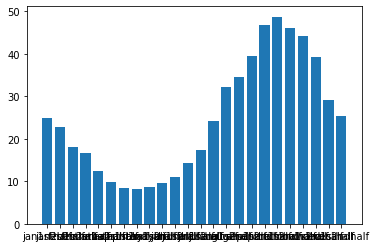

In [38]:
x=train_dengai_dt.groupby('weekhalf_names')["total_cases"].mean()
plt.bar(x=x.index,height=x)

<BarContainer object of 12 artists>

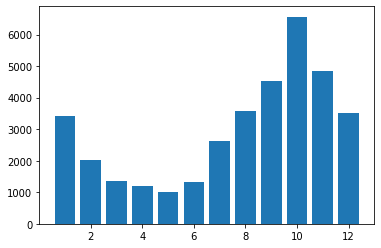

In [39]:
x=train_dengai_dt.groupby('month')["total_cases"].sum()
plt.bar(x=x.index,height=x)

<BarContainer object of 53 artists>

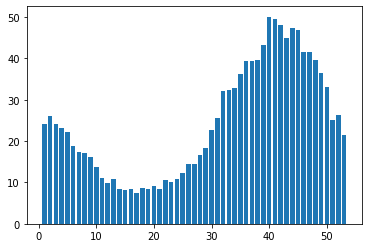

In [40]:
x=train_dengai_dt.groupby('weekofyear')["total_cases"].mean()
plt.bar(x=x.index,height=x)

In [41]:
pp.ProfileReport(train_dengai_dt)

NameError: name 'pp' is not defined

In [ ]:
train_dengai_dt.shape

In [ ]:
test_dengai_dt.shape

In [42]:
train_dengai_dt.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'monthNames', 'weekhalf_names'],
      dtype='object')

### na dealing

In [43]:
train_dengai_dt.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

### forward fill

In [44]:
tr_sj=train_dengai_dt.loc[train_dengai_dt['city'] == "sj"]
te_sj=test_dengai_dt.loc[test_dengai_dt['city'] == "sj"]
tr_iq=train_dengai_dt.loc[train_dengai_dt['city'] == "iq"]
te_iq=test_dengai_dt.loc[test_dengai_dt['city'] == "iq"]

In [45]:
tr_sj.fillna(method="ffill",inplace=True)
tr_iq.fillna(method="ffill",inplace=True)
te_sj.fillna(method="ffill",inplace=True)
te_iq.fillna(method="ffill",inplace=True)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\pandas\core\frame.py:4239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [46]:
train_dengai_dt1=pd.concat([tr_sj,tr_iq],axis=0)

In [47]:
test_dengai_dt1=pd.concat([te_sj,te_iq],axis=0)

In [48]:
train_dengai_dt1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,monthNames,weekhalf_names
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4,apr,april2ndhalf
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5,may,may1sthalf
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5,may,may1sthalf
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5,may,may2ndhalf
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5,may,may2ndhalf
5,sj,1990,23,1990-06-04,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,...,2.100000,28.114286,6.942857,34.4,23.9,39.1,2,6,jun,jun1sthalf
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,2.042857,27.414286,6.771429,32.2,23.3,29.7,4,6,jun,jun1sthalf
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,1.571429,28.371429,7.685714,33.9,22.8,21.1,5,6,jun,jun1sthalf
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,1.885714,28.328571,7.385714,33.9,22.8,21.1,10,6,jun,jun2ndhalf
9,sj,1990,27,1990-07-02,0.102450,0.121550,0.160683,0.202567,14.41,300.154286,...,2.014286,28.328571,6.514286,33.9,24.4,1.1,6,7,jul,jun2ndhalf


In [49]:
tr_sj.shape

(936, 28)

In [50]:
train_dengai_dt1.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [51]:
test_dengai_dt1.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [52]:
model2 = train_dengai_dt1.copy()
model2test = test_dengai_dt1.copy()

In [53]:


model2.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,monthNames,weekhalf_names
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4,apr,april2ndhalf
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5,may,may1sthalf
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5,may,may1sthalf
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5,may,may2ndhalf
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5,may,may2ndhalf


In [54]:
model2test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,monthNames,weekhalf_names
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4,apr,april2ndhalf
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5,may,may1sthalf
2,sj,2008,20,2008-05-13,-0.0015,-0.012400,0.151083,0.091529,3.66,299.455714,...,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5,may,may1sthalf
3,sj,2008,21,2008-05-20,-0.0015,-0.019867,0.124329,0.125686,0.00,299.690000,...,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5,may,may2ndhalf
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5,may,may2ndhalf


In [55]:
y = model2["total_cases"]

In [56]:
model2x = model2.copy().drop(["total_cases"],axis = 1)

In [57]:
model2x = model2x.drop(["year"],axis=1)

In [58]:
model2x = model2x.drop(["week_start_date"],axis=1)

In [59]:
model2x = model2x.drop(["month"],axis=1)

In [60]:
model2test = model2test.drop(["year"],axis=1)

In [61]:
model2test = model2test.drop(["week_start_date"],axis=1)

In [62]:
model2test = model2test.drop(["month"],axis=1)

In [63]:
model2x = pd.get_dummies(model2x,columns=["weekhalf_names","city","monthNames"],drop_first=True)

In [64]:
model2test = pd.get_dummies(model2test,columns=["weekhalf_names","city","monthNames"],drop_first=True)

In [65]:
model2x.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekhalf_names_jan2sthalf',
       'weekhalf_names_feb1sthalf', 'weekhalf_names_feb2sthalf',
       'weekhalf_names_mar1sthalf', 'weekhalf_names_mar2sthalf',
       'weekhalf_names_apr1sthalf', 'weekhalf_names_april2ndhalf',
       'weekhalf_names_may1sthalf', 'weekhalf_names_may2ndhalf',
       'weekhalf_names_jun1sthalf', 'weekhalf_names_jun2ndhalf',
       'weekhalf_names_jul1sthalf', 'weekhalf_names_jul2ndhalf',
       'week

In [66]:
model2test.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekhalf_names_jan2sthalf',
       'weekhalf_names_feb1sthalf', 'weekhalf_names_feb2sthalf',
       'weekhalf_names_mar1sthalf', 'weekhalf_names_mar2sthalf',
       'weekhalf_names_apr1sthalf', 'weekhalf_names_april2ndhalf',
       'weekhalf_names_may1sthalf', 'weekhalf_names_may2ndhalf',
       'weekhalf_names_jun1sthalf', 'weekhalf_names_jun2ndhalf',
       'weekhalf_names_jul1sthalf', 'weekhalf_names_jul2ndhalf',
       'week

In [67]:
model2x["weekofyear"]=model2x["weekofyear"].astype("category")

In [68]:
model2test["weekofyear"]=model2test["weekofyear"].astype("category")

In [69]:
model2x.shape

(1456, 56)

In [70]:
model2test.shape

(416, 56)

In [71]:
model2x.dtypes

weekofyear                               category
ndvi_ne                                   float64
ndvi_nw                                   float64
ndvi_se                                   float64
ndvi_sw                                   float64
precipitation_amt_mm                      float64
reanalysis_air_temp_k                     float64
reanalysis_avg_temp_k                     float64
reanalysis_dew_point_temp_k               float64
reanalysis_max_air_temp_k                 float64
reanalysis_min_air_temp_k                 float64
reanalysis_precip_amt_kg_per_m2           float64
reanalysis_relative_humidity_percent      float64
reanalysis_sat_precip_amt_mm              float64
reanalysis_specific_humidity_g_per_kg     float64
reanalysis_tdtr_k                         float64
station_avg_temp_c                        float64
station_diur_temp_rng_c                   float64
station_max_temp_c                        float64
station_min_temp_c                        float64


In [72]:
model2x.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekhalf_names_jan2sthalf',
       'weekhalf_names_feb1sthalf', 'weekhalf_names_feb2sthalf',
       'weekhalf_names_mar1sthalf', 'weekhalf_names_mar2sthalf',
       'weekhalf_names_apr1sthalf', 'weekhalf_names_april2ndhalf',
       'weekhalf_names_may1sthalf', 'weekhalf_names_may2ndhalf',
       'weekhalf_names_jun1sthalf', 'weekhalf_names_jun2ndhalf',
       'weekhalf_names_jul1sthalf', 'weekhalf_names_jul2ndhalf',
       'week

In [73]:
#(#model2x = model2x.drop(['weekhalf_names_jan2sthalf',
 #      'weekhalf_names_feb1sthalf', 'weekhalf_names_feb2sthalf',
  #     'weekhalf_names_mar1sthalf', 'weekhalf_names_mar2sthalf',
 #      'weekhalf_names_apr1sthalf', 'weekhalf_names_april2ndhalf',
 #      'weekhalf_names_may1sthalf', 'weekhalf_names_may2ndhalf',
  #     'weekhalf_names_jun1sthalf', 'weekhalf_names_jun2ndhalf',
 #      'weekhalf_names_jul1sthalf', 'weekhalf_names_jul2ndhalf',
 #      'weekhalf_names_aug1sthalf', 'weekhalf_names_aug2ndhalf',
#       'weekhalf_names_sep1sthalf', 'weekhalf_names_sep2ndhalf',
#       'weekhalf_names_oct1sthalf', 'weekhalf_names_oct2ndhalf',
#       'weekhalf_names_nov1sthalf', 'weekhalf_names_nov2ndhalf',
#       'weekhalf_names_dec1sthalf', 'weekhalf_names_dec2ndhalf'],axis=1))

In [74]:
#model2test = model2test.drop(['weekhalf_names_jan2sthalf',
#       'weekhalf_names_feb1sthalf', 'weekhalf_names_feb2sthalf',
#       'weekhalf_names_mar1sthalf', 'weekhalf_names_mar2sthalf',
#       'weekhalf_names_apr1sthalf', 'weekhalf_names_april2ndhalf',
#       'weekhalf_names_may1sthalf', 'weekhalf_names_may2ndhalf',
#       'weekhalf_names_jun1sthalf', 'weekhalf_names_jun2ndhalf',
#       'weekhalf_names_jul1sthalf', 'weekhalf_names_jul2ndhalf',
#       'weekhalf_names_aug1sthalf', 'weekhalf_names_aug2ndhalf',
#       'weekhalf_names_sep1sthalf', 'weekhalf_names_sep2ndhalf',
#       'weekhalf_names_oct1sthalf', 'weekhalf_names_oct2ndhalf',
#       'weekhalf_names_nov1sthalf', 'weekhalf_names_nov2ndhalf',
#       'weekhalf_names_dec1sthalf', 'weekhalf_names_dec2ndhalf'],axis=1)

In [75]:
model2x = pd.get_dummies(model2x,columns=["weekofyear"],drop_first=True)
model2test = pd.get_dummies(model2test,columns=["weekofyear"],drop_first=True)

# model - 1

In [76]:
X_train, X_test, y_train, y_test = train_test_split(model2x, y, test_size=0.20)

In [77]:
model2x.isna().sum()

ndvi_ne                 0
ndvi_nw                 0
ndvi_se                 0
ndvi_sw                 0
precipitation_amt_mm    0
                       ..
weekofyear_49           0
weekofyear_50           0
weekofyear_51           0
weekofyear_52           0
weekofyear_53           0
Length: 107, dtype: int64

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1164, 107)
(292, 107)
(1164,)
(292,)


In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [80]:
model2test = scaler.transform(model2test)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
fit1 = lr.fit(X_train,y_train)

In [84]:
pre_lr = lr.predict(X_test)

In [85]:
from sklearn.metrics import mean_absolute_error

In [86]:
mean_absolute_error(y_pred=pre_lr,y_true=y_test)

24.103020894505235

In [88]:
import xgboost

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [90]:
xgb = XGBRegressor()

In [ ]:
gbc = GradientBoostingClassifier

In [ ]:
gbr

In [ ]:
gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
fit5 = xgb.fit(X=X_train,y=y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:15:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
fit2 = dtr.fit(X_train,y_train)
fit3 = rfr.fit(X_train,y_train)
fit4 = gbr.fit(X_train,y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
fitx = gbc.fit(X=X_train,y=y_train)

In [95]:
pre_dtr = dtr.predict(X_test)
pre_rfr = rfr.predict(X_test)
pre_gbr = gbr.predict(X_test)
pre_xgb = xgb.predict(X_test)

In [96]:
mean_absolute_error(y_pred=pre_dtr,y_true=y_test)

18.40753424657534

In [97]:
mean_absolute_error(y_pred=pre_rfr,y_true=y_test)

15.008219178082191

In [98]:
mean_absolute_error(y_pred=pre_gbr,y_true=y_test)

14.279323017972837

In [99]:
mean_absolute_error(y_pred=pre_xgb,y_true=y_test)

15.165765355302863

In [101]:
pre_xgb_realtest = xgb.predict(model2test)

In [102]:
test_dengai_dt_submission = test_dengai_dt.copy().drop(['week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',"month","weekhalf_names","monthNames"],axis=1)

In [103]:
test_dengai_dt_submission.head()

,city,year,weekofyear
0,sj,2008,18
1,sj,2008,19
2,sj,2008,20
3,sj,2008,21
4,sj,2008,22


In [104]:
test_dengai_dt_submission["total_cases"]=pre_xgb_realtest

In [105]:
test_dengai_dt_submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,4.105363
1,sj,2008,19,-2.397688
2,sj,2008,20,6.932043
3,sj,2008,21,10.385000
4,sj,2008,22,14.879810


In [106]:
import math

In [107]:
test_dengai_dt_submission.total_cases=test_dengai_dt_submission.total_cases.round()

In [108]:
test_dengai_dt_submission.sample()

,city,year,weekofyear,total_cases
241,sj,2012,50,20.0


In [109]:
test_dengai_dt_submission.total_cases=test_dengai_dt_submission.total_cases.astype("int64")

In [110]:
test_dengai_dt_submission.to_csv("mod8.csv",header=True,index=False)


In [ ]:
X_train

In [ ]:
train_dengai_dt["total_cases"].value_counts()